In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import nibabel as nib

from scipy.io import loadmat



2D image: 


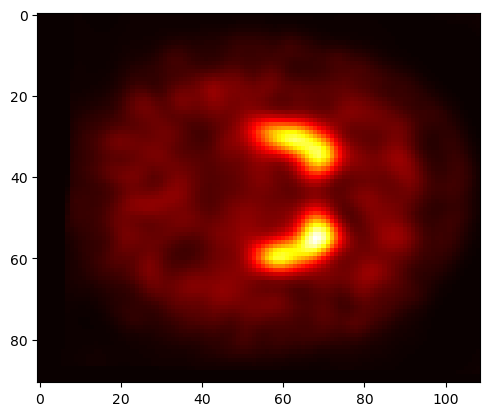

In [8]:
img_2d = nib.load("affine_p75_withACSC_multipleTemplates_woCerebellum/2d/slab0001.nii")

#print(img_2d.header)

#   get image data as numpy array
a = img_2d.get_fdata()

print('2D image: ')
plt.imshow(a, cmap='hot')
plt.show()


Slice 0 of volume image: 


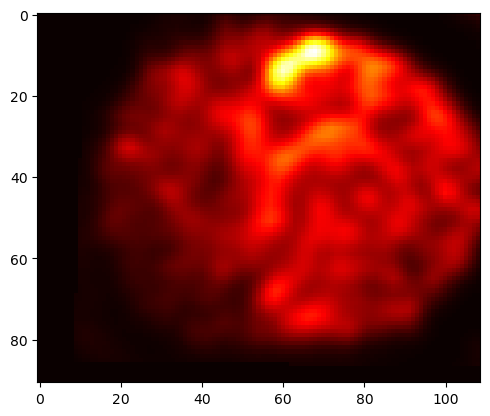

In [7]:
# 3D image (show one slice)

img_3d = nib.load("affine_p75_withACSC_multipleTemplates_woCerebellum/3d/vol0001.nii")

# Reshape image from shape (h,w,img) to (img,h,w)

#print(f'shape before: {img_3d.get_fdata().shape}')
img_3d_reshaped = np.transpose(img_3d.get_fdata(), (2, 0, 1))
#print(f'shape after: {img_3d_reshaped.shape}')

#   Show slice
print('Slice 0 of volume image: ')
plt.imshow(img_3d_reshaped[0], cmap='hot')
plt.show()



In [6]:


def plot_animation_for_image(img):

    fig, ax = plt.subplots()

    img_slice = ax.imshow(img[0], cmap='hot')

    def init_func():
        img_slice.set_array(img[0])
        return img_slice,

    def update_func(idx):
        img_slice.set_array(img[idx])
        return img_slice,

    ani = FuncAnimation(fig=fig,
                        func=update_func,
                        frames=len(img),
                        init_func=init_func,
                        blit=True)

    plt.close()

    return ani.to_jshtml()


HTML(plot_animation_for_image(img=img_3d_reshaped))


In [9]:
# Inspect MAT file

# Load the mat file
mat_data = loadmat('mat/mat0216.mat')



In [ ]:
#  Labels are in Excel file..

